# NETW 1013 Clustering Project 

**Objective:** 
The objective of this project is to teach students how to apply clustering to real datasets.

You should be able to answer the following questions and provide reasonable justification for your answers: 
* Which clustering approach have you decided to use on each dataset? 
* Compare between Kmeans, Hierarchal and DBScan.
* Discuss how you tuned your clustering hyperparameters to achieve the best cluster assignment?
* What is the effect of different distance functions on the calculated clusters?
* How did you evaluate the performance of different clustering techniques on different datatsets?
* Visualize your output where applicable.
* What is the effect of scaling on the performance of clustering techniques? 

 
 



Running this project requires the following imports:

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
import scipy.cluster.hierarchy as sch
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.stats import multivariate_normal

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

import itertools

In [ ]:
def display_cluster(X, km=None, num_clusters=0, no_center=1):
    color = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#800000', '#008000', '#000080', '#808000', '#008080', '#800080']
    no_of_features = X.shape[1]
    plt.rcParams['figure.figsize'] = [10,3]

    if no_of_features != 2:
        for i in range(no_of_features-1):
            for j in range(i+1, no_of_features):
                fig,ax = plt.subplots()  
                if km is not None:  
                    for k in range(num_clusters):
                        if(no_center==0):
                            ax.scatter(km.cluster_centers_[:, i][k], km.cluster_centers_[:, j][k], c=color[k], marker='s', s=20)
                            ax.scatter(X[km.labels_ == k, i], X[km.labels_ == k, j], c=color[k], alpha=0.5, s=20)
                            ax.set_xlabel('Feature ' + str(i+1))
                            ax.set_ylabel('Feature ' + str(j+1))
                        else:
                            ax.scatter(X[km.labels_ == k, i], X[km.labels_ == k, j], c=color[k], alpha=0.5, s=20)
                            ax.set_xlabel('Feature ' + str(i+1))
                            ax.set_ylabel('Feature ' + str(j+1))              
                        
                    ax.set_title('Clustered Data with ' + str(num_clusters) + ' Clusters')
                else:
                     ax.scatter(X[:, i], X[:, j], c=color[0], alpha=0.5, s=20)
                     ax.set_xlabel('Feature ' + str(i+1))
                     ax.set_ylabel('Feature ' + str(j+1))
                     ax.set_title('Original Data')
                plt.show();
    
    else:  
        fig, ax = plt.subplots()  
        if km is not None: 
            for k in range(num_clusters):
                if(no_center==0):
                    ax.scatter(km.cluster_centers_[:, 0][k], km.cluster_centers_[:, 1][k], c=color[k], marker='s', s=20)
                    ax.scatter(X[km.labels_ == k, 0], X[km.labels_ == k, 1], c=color[k], alpha=0.5, s=20)
                    ax.set_xlabel('Feature 1')
                    ax.set_ylabel('Feature 2')
                else:
                    ax.scatter(X[km.labels_ == k, 0], X[km.labels_ == k, 1], c=color[k], alpha=0.5, s=20)
                    ax.set_xlabel('Feature 1')
                    ax.set_ylabel('Feature 2')
                    

            ax.set_title('Clustered Data with ' + str(num_clusters) + ' Clusters')
        else:
            ax.scatter(X[:, 0], X[:, 1], c=color[0], alpha=0.5, s=20)
            ax.set_xlabel('Feature 1')
            ax.set_ylabel('Feature 2')
            ax.set_title('Original Data')

        plt.show();
        
        
        
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster2(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)        


## Multi Blob Data Set 
* The dataset generated below is known to be best clustered into 6 clusters.
* Cluster the data set below using the three different clustering techniques discussed in the course.
* Visualize your clustering output in each step of your work.



In [ ]:
#Data Generation and Visualization
plt.rcParams['figure.figsize'] = [10,3]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

In [ ]:
#This scales the features to have a mean of 0 and a standard deviation of 1,
#making them more suitable for clustering and other machine learning tasks.

# Scale the dataset
scaler = StandardScaler()
Multi_blob_Data_scaled = scaler.fit_transform(Multi_blob_Data)

# Visualize the scaled data
display_cluster(Multi_blob_Data_scaled)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data. 
* Display the outcome of each value of K. 
* Plot distortion function versus K and choose the approriate value of K. 
* Plot the silhouette_score versus K and use it to choose the best K. 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 
* Comment on the effect of centroid initialization on cluster assignment. 
* Hint: Lookup k-means++ .

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming X is the Multi_blob_Data_scaled
X = Multi_blob_Data_scaled
distortion_values = []
silhouette_values = []
no_of_clusters = range(2, 11)

# Create a figure with a grid for the iterative clustering plots (3x3)
fig, axs = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid for the cluster plots
axs = axs.flatten()  # Flatten to easily access individual subplots

# Loop over different values of K and plot clusters in the large graph
for K in range(2, 11):
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(X)
    labels = kmeans.labels_
    distortion_values.append(kmeans.inertia_)
    silhouette_values.append(silhouette_score(X, labels))

    # Plot the clusters in the respective subplot (within the large graph)
    axs[K-2].scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1', edgecolors='k', alpha=0.7)
    
    # Plot the centroids
    centroids = kmeans.cluster_centers_
    axs[K-2].scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label="Centroids")
    
    axs[K-2].set_title(f"Clusters for K={K}")
    axs[K-2].set_xlabel("Feature 1")
    axs[K-2].set_ylabel("Feature 2")
    axs[K-2].legend()

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# Plot the Distortion vs K in a separate figure
plt.figure(figsize=(6, 5))
plt.plot(range(2, 11), distortion_values)
plt.xlabel("K")
plt.ylabel("Distortion")
plt.title("Distortion vs K")
plt.show()

# Find the best K and Silhouette score
best_K = no_of_clusters[np.argmax(silhouette_values)]
best_silhouette = silhouette_values[np.argmax(silhouette_values)]

# Print Best K and Silhouette in a separate plot
plt.figure(figsize=(6, 5))
plt.plot(range(2, 11), silhouette_values)
plt.scatter(best_K, best_silhouette, color='red', label=f"Best K={best_K} with Silhouette={best_silhouette:.2f}")
plt.xlabel("K")
plt.ylabel("Silhouette")
plt.title("Silhouette Score vs K")
plt.legend()
plt.show()

# Print Best K
print(f"Best K: {best_K}, Best Silhouette: {best_silhouette}")


### Conclusion

* It is claear the using the Distortion can't give a clear indication for the best number of clusers; as there is no clear elbow found,
*  so other methods must be apporached to locate the best K, on such method is the silhouette score, which successfully confirms that optimum value for K, which is k = 6
 

In [ ]:
# Run the K-means with K-Means++ initialzation
k_means_plus = KMeans(n_clusters=6, init='k-means++')
y_kmeans_plus = k_means_plus.fit_predict(Multi_blob_Data_scaled)

silhouette_score_kmeans_plus_multiblob = silhouette_score (Multi_blob_Data_scaled, y_kmeans_plus)
display_cluster(Multi_blob_Data_scaled, km= k_means_plus, num_clusters=6)

print(f'Silhouette Score (K-Means++): {silhouette_score_kmeans_plus_multiblob:.4f}')


### **K-Means++ in Clustering**  
**K-Means++** is an improved initialization technique for the **K-Means clustering algorithm**. Unlike standard K-Means, which selects initial cluster centers randomly, K-Means++ chooses them more strategically to improve convergence and avoid poor clustering.

#### **How It Works:**
1. selecting the **first** centroid randomly
2. then choosing each subsequent centroid based on a **probability proportional to the squared distance from the nearest existing centroid**
3. this ensures that the new centroid is more likely to be far away from the existing ones,


### **Results**
In this code, K-Means++ is used to initialize centroids for K=6, which should result in
* better cluster formation 
* more accurate representation of the data distribution.

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data.
* In the  AgglomerativeClustering change the following parameters:
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage(try different options)
    * Distance_threshold (try different options)
* Plot the dendrograph for one trial.
* For each of these trials, calculate the silhouette_score and display the resulting clusters.  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation.

In [ ]:
import matplotlib.pyplot as plt
import itertools
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Define parameter options
metric_options = ['euclidean', 'manhattan', 'cosine']  
linkage_options = ['ward', 'complete', 'average', 'single']
distance_thresholds = [2, 3, 4, 5, 10]  # Experiment with different thresholds

# Store results for comparison
silhouette_scores_hierarchical_multiblob = {}
best_clustering_labels = None  # To store the best labels for the best case

# List to store the valid plot data for each combination
valid_plots = []

# Iterate over all parameter combinations
for metric, linkage, threshold in itertools.product(metric_options, linkage_options, distance_thresholds):
    # Skip invalid combinations (ward linkage only supports Euclidean)
    if linkage == 'ward' and metric != 'euclidean':
        continue

    try:
        # Apply Agglomerative Clustering
        clustering = AgglomerativeClustering(metric=metric, linkage=linkage, distance_threshold=threshold, n_clusters=None)
        y_hierarchical = clustering.fit_predict(Multi_blob_Data_scaled)

        # Compute silhouette score
        score = silhouette_score(Multi_blob_Data_scaled, y_hierarchical)

        # Store the score for this parameter set
        silhouette_scores_hierarchical_multiblob[(metric, linkage, threshold)] = score

        # If the score is the best, store the labels for later comparison
        if best_clustering_labels is None or score > max(silhouette_scores_hierarchical_multiblob.values()):
            best_clustering_labels = y_hierarchical

        # Store this valid plot data
        valid_plots.append((metric, linkage, threshold, y_hierarchical, score))

    except Exception as e:
        print(f"Skipping {metric}, {linkage}, Threshold={threshold} due to error: {e}")

# Total valid plots (i.e., non-skipped)
total_valid_plots = len(valid_plots)

# Calculate required grid size (adjusted to cover all valid combinations)
ncols = 3  # Set fixed number of columns (can be adjusted)
nrows = np.ceil(total_valid_plots / ncols).astype(int)  # Determine number of rows dynamically

# Create a figure with a grid for the iterative clustering plots
fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows * 5))
axs = axs.flatten()  # Flatten to easily access individual subplots

# Plot each valid combination
for idx, (metric, linkage, threshold, y_hierarchical, score) in enumerate(valid_plots):
    axs[idx].scatter(Multi_blob_Data_scaled[:, 0], Multi_blob_Data_scaled[:, 1], c=y_hierarchical, cmap='viridis', s=20)
    axs[idx].set_title(f"{metric}, {linkage}, Threshold={threshold}\nSilhouette: {score:.4f}")

    # Plot centroids (using arbitrary centroids since Agglomerative doesn't provide them directly)
    for cluster in set(y_hierarchical):
        cluster_points = Multi_blob_Data_scaled[y_hierarchical == cluster]
        centroid = cluster_points.mean(axis=0)
        axs[idx].scatter(centroid[0], centroid[1], s=200, c='black', marker='X', label="Centroids" if cluster == 0 else "")

# If there are unused axes (due to fewer valid plots than the total grid size), hide them
for idx in range(total_valid_plots, len(axs)):
    axs[idx].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


# Perform Agglomerative Clustering (one case) - Using the best parameters yielded by previous cells
agg_clustering = AgglomerativeClustering(n_clusters= None, linkage='ward', metric='euclidean',distance_threshold=10)
y_agg = agg_clustering.fit_predict(Multi_blob_Data_scaled)

# Plot Clusters
plt.figure(figsize=(8, 8))
plt.scatter(Multi_blob_Data_scaled[:, 0], Multi_blob_Data_scaled[:, 1], c=y_agg, cmap='viridis', s=20, alpha=0.7)
plt.title('Agglomerative Clustering (Ward Linkage, Euclidean Distance, Distance Threshold = 10)')
plt.show()

# Plot Dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data_scaled, method='ward'))
plt.title('Dendrogram - Hierarchical Clustering (Ward Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


# Display best results
print(f"Best parameters for Agglomerative Clustering on Multi-Blob Data: {best_params_hierarchical_multiblob}")
print(f"Best Silhouette Score: {best_silhouette_score_hierarchical_multiblob}")


### **Reason for Skipping Certain Combinations**  
The skipped clustering attempts failed because they resulted in only **one cluster** (i.e., all points were assigned to the same cluster). Agglomerative clustering requires at least **two clusters** to compute meaningful labels, and the error message explicitly states:  
> *"Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)."*  

This issue likely arises when:  
- The **distance metric** (e.g., Manhattan or Cosine) and **linkage method** (e.g., Single or Average) cause all data points to be grouped too aggressively at a very low threshold.  
- The **threshold value** is too high, merging all points into a single cluster before reaching a meaningful distinction.  

### **Summary**  
The skipped clustering attempts occurred because some combinations of **distance metrics (Manhattan, Cosine), linkage methods (Single, Average, Complete), and threshold values** led to only **one cluster**, which is invalid for Agglomerative Clustering. After testing multiple combinations, the best parameters found were:  
 **Metric:** Euclidean  
 **Linkage:** Ward  
 **Threshold:** 10  

This combination produced the best **Silhouette Score** of **0.4548664117944667**.

In [ ]:
# Perform Agglomerative Clustering (one case) - Using the best parameters yielded by previous cells
agg_clustering = AgglomerativeClustering(n_clusters= None, linkage='ward', metric='euclidean',distance_threshold=10)
y_agg = agg_clustering.fit_predict(Multi_blob_Data_scaled)


# Plot Clusters
plt.figure(figsize=(8, 8))
plt.scatter(Multi_blob_Data_scaled[:, 0], Multi_blob_Data_scaled[:, 1], c=y_agg, cmap='viridis', s=20, alpha=0.7)
plt.title('Agglomerative Clustering (Ward Linkage, Euclidean Distance, Distance Threshold = 10)')
plt.show()

# Plot Dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data_scaled, method='ward'))
plt.title('Dendrogram - Hierarchical Clustering (Ward Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

### **Key Insights:**  
- Ward linkage combined with Euclidean distance yields the most effective clustering because it minimizes variance within clusters. This approach naturally aligns with the dataset’s structure, ensuring compact and well-separated clusters.  

- A threshold of 10 provides a balanced number of clusters, preventing excessive merging. A higher threshold would combine distinct clusters too early, while a lower threshold would create too many small clusters, obscuring the overall pattern.  

- Ward linkage is particularly effective with Euclidean distance as it merges clusters in a way that minimizes within-cluster variance, leading to well-balanced groupings. In contrast, methods like complete or average linkage can sometimes result in imbalanced clusters or fail to capture the dataset’s structure accurately.  

- Compared to Manhattan or Cosine distance, Euclidean distance is more suitable for this dataset because it directly reflects the geometric spacing between points, which is crucial for distinguishing the well-separated clusters.  

- Alternative linkage methods (single, complete, average) may either merge clusters too aggressively or fail to maintain clear separations. Ward linkage preserves the hierarchical structure in a way that best reflects the dataset’s natural grouping.  

- The resulting clusters are distinct and well-defined, with minimal misclassification or noise. This confirms that using Ward linkage with Euclidean distance and a threshold of 10 effectively captures the dataset’s structure.  

- Overall, this parameter combination offers the best balance between detail and separation, making it the most suitable choice for clustering the multi-blob dataset.

### DBScan
* Use DBScan function to  to cluster the above data. 
* In the  DBscan change the following parameters: 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
    * Another option: Lookup K-Distance graph method
* Plot the silhouette_score versus the variation in the EPS and the min_samples.
* Plot the resulting Clusters in this case. 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments. 

In [ ]:
X=Multi_blob_Data_scaled
eps_range = np.arange(0.1, 3.1, 0.1)
minimum_samples_range = np.arange(5, 26, 1)

# Store results
silhouette_scores = []
best_score = -1
best_params = None

for epsilon in eps_range:
    for minimum_samples in minimum_samples_range:
        dbscan = DBSCAN(eps=epsilon, min_samples=minimum_samples)
        labels = dbscan.fit_predict(X)  
        
        n_clusters = len(set(labels) - {-1})
        
        if n_clusters > 1:
            score = silhouette_score(X, labels)
            silhouette_scores.append((epsilon, minimum_samples, score, n_clusters))
        
            # Update best score
            if score > best_score:
                best_score = score
                best_params = (epsilon, minimum_samples, n_clusters)

            # Print each iteration's results
            print(f"eps: {epsilon:.2f}, min_samples: {minimum_samples}, Clusters: {n_clusters}, Silhouette Score: {score:.4f}")
            


# Convert results to a NumPy array
results = np.array(silhouette_scores, dtype=object)

# Create a pivot table for heatmap
heatmap_data = np.full((len(minimum_samples_range), len(eps_range)), np.nan)

for i, min_samples in enumerate(minimum_samples_range):
    for j, eps in enumerate(eps_range):
        match = results[(results[:, 0] == eps) & (results[:, 1] == min_samples)]
        if len(match) > 0:
            heatmap_data[i, j] = match[0, 2]  # Silhouette score

# Plot the heatmap
plt.figure(figsize=(25, 6))
ax = sns.heatmap(heatmap_data, xticklabels=np.round(eps_range, 3),
                 yticklabels=minimum_samples_range, cmap="coolwarm", annot=True,
                 fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Silhouette Score'})

plt.xlabel("EPS")
plt.ylabel("Min Samples")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.title("Silhouette Score Heatmap for DBSCAN")
plt.show()

# Print Best Parameters
print("\nBest Parameters:")
print(f"EPS: {best_params[0]:.3f}, Min Samples: {best_params[1]}, Clusters: {best_params[2]}")
print(f"Best Silhouette Score: {best_score:.4f}")

# Plot best clustering result
best_eps, best_min_samples, _ = best_params
best_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_model.fit_predict(Multi_blob_Data_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=Multi_blob_Data_scaled[:, 0], y=Multi_blob_Data_scaled[:, 1], hue=best_labels, palette='viridis', alpha=0.6)
plt.scatter(best_model.components_[:, 0], best_model.components_[:, 1], c='red', marker='x', s=100, label='Core Points')
plt.title(f"Best Clustering (EPS={best_eps:.3f}, Min Samples={best_min_samples})")
plt.legend()
plt.show()


### **Results**

1. The heatmap indicates that most silhouette scores are negative, suggesting that the clustering was not effective for most parameter combinations.  
2. The highest silhouette score achieved was **0.3038** with **EPS = 0.300** and **Min Samples = 20**. While not exceptional, this was the best result from the tested configurations.  
3. Upon examining the actual clusters:  
   - The red Xs represent the core points, which appear to form fairly distinct clusters.  
   - There is a noticeable amount of noise (depicted by purple points), which DBSCAN successfully identified.  
   - Some clusters appear somewhat elongated, but this is expected, as DBSCAN handles such cases better than k-means.  
4. In general, DBSCAN did a reasonable job of distinguishing dense regions, though it is not flawless.  
5. To improve the clustering, we could:  
   - Adjust EPS in smaller increments to see if a clearer separation can be achieved.  
   - Lower Min Samples slightly to potentially detect smaller clusters.

## **Final conclusion** 

### Here's a table summarizing the silhouette scores for each clustering technique:

Here is the updated table with the additional details for the parameters:

| Clustering Method               | Silhouette Score | Parameters                                                                                           |
|----------------------------------|------------------|------------------------------------------------------------------------------------------------------|
| K-Means                          | 0.4862522276594507 | Number of clusters = 6                                                                                  |
| K-Means++                        | 0.4863           | Number of clusters = 6                                                                                  |
| Hierarchical (Agglomerative) Clustering | 0.4548664117944667 | Metric = Euclidean, Linkage = Ward, Distance threshold = 10                                             |
| DBSCAN                           | 0.3038           | EPS = 0.300, Min Samples = 18, Clusters = 2                                                           |



### Which Clustering Method Works Best for the Dataset?

* K-Means produced the best results for clustering the multi-blob dataset. The silhouette score was the highest, indicating that the clusters were well-separated and compact.

* K-Means performed well because the dataset consisted of distinct, evenly spaced clusters. Since K-Means assumes clusters are circular and of similar size, it was an ideal fit for this dataset. The K-Means++ initialization also helped by positioning the centroids effectively, preventing poor initial placements.

* In contrast, DBSCAN struggled with this dataset because it relies on density to identify clusters. It classified too many points as noise, which hindered its ability to properly separate the blobs. DBSCAN performs better with datasets that have consistent densities, but this dataset had some variations in density, which made DBSCAN less effective.

* Agglomerative Clustering, using Ward linkage and Euclidean distance, performed reasonably well, though it was still not as effective as K-Means. This method occasionally merged clusters in a way that misclassified a few points. It is also not as suited for evenly sized, well-separated clusters, which made it less optimal for this dataset.

* **In conclusion**, K-Means was the most suitable method as it accurately grouped the data without mislabeling noise points (like DBSCAN) or merging clusters inappropriately (like Agglomerative Clustering).

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers. 

The data represents three classes. 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


* Repeat all the above clustering approaches and steps on the above data. 
* Comment on the effect of scaling on clustering this dataset. Show the difference between clustering the data with and without   scaling.
* Compare between the different clustering approaches. 
* Is your clustering outcome consistent with the labels?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load dataset
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['species'] = iris_data.target

# Scale the data
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df.iloc[:, :-1])
iris_scaled_df = pd.DataFrame(iris_scaled, columns=iris_data.feature_names)
iris_scaled_df['species'] = iris_df['species']

# Pairplot before scaling
sns.pairplot(iris_df, hue="species", palette="viridis", diag_kind="kde")
plt.suptitle("Unscaled Iris Data", y=1.02)
plt.show()

# Pairplot after scaling
sns.pairplot(iris_scaled_df, hue="species", palette="viridis", diag_kind="kde")
plt.suptitle("Scaled Iris Data", y=1.02)
plt.show()


# K-means for the unscaled dataset

In [ ]:
# Load dataset
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Elbow Method: Finding the optimal K
k_values = range(1, 11)
ssd = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(iris_df).inertia_ for k in k_values]

# Plot SSD (Elbow Method)
plt.figure(figsize=(8, 5))
sns.lineplot(x=k_values, y=ssd, marker='o', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method for Optimal K (Unscaled Data)')
plt.xticks(k_values)
plt.grid()
plt.show()

# Clustering visualization for different K values
k_values_to_try = [2, 3, 4, 5]
iris_df_long = iris_df.copy()

# Create clusters and centroids storage
centroids_dict = {}

for k in k_values_to_try:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(iris_df)
    iris_df_long[f'Cluster_K{k}'] = kmeans.labels_
    centroids_dict[k] = kmeans.cluster_centers_  # Store centroids

# Convert to long format for easier plotting
iris_melted = iris_df_long.melt(id_vars=iris_data.feature_names, 
                                value_vars=[f'Cluster_K{k}' for k in k_values_to_try], 
                                var_name='K', value_name='Cluster')

# Map K labels to readable format
iris_melted['K'] = iris_melted['K'].str.replace('Cluster_K', 'K=')

# FacetGrid for better visualization
g = sns.FacetGrid(iris_melted, col="K", col_wrap=2, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.scatterplot, x=iris_data.feature_names[0], y=iris_data.feature_names[1], hue="Cluster", palette="husl", alpha=0.8)

# Overlay centroids
for ax, k in zip(g.axes.flat, k_values_to_try):
    centroids = centroids_dict[k]
    ax.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroids')

# Adjust legend
g.add_legend()
g.set_axis_labels("Sepal Length", "Sepal Width")
g.fig.suptitle("K-Means Clustering for Different K Values (Unscaled Data)", y=1.05)
plt.show()


### There is no **Clear Elbow**, **silhouette score** is to be used

In [ ]:
# Load dataset
iris_data = load_iris()
X = iris_data.data

# Define K range and compute silhouette scores
K_range = range(2, 11)
silhouette_scores = []

# Loop through K values and compute silhouette scores
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for K={k}: {score:.4f}")

# Find the optimal K
optimal_K = K_range[np.argmax(silhouette_scores)]
print(f"\nThe optimal number of clusters (K) is: {optimal_K}")

# Plot silhouette scores with improved aesthetics
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(x=list(K_range), y=silhouette_scores, marker="o", linestyle="--", color="b", label="Silhouette Score")
plt.axvline(optimal_K, color='red', linestyle='--', label=f"Best K = {optimal_K}")
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K (Unscaled Data)')
plt.xticks(list(K_range))
plt.grid()
plt.legend()
plt.show()


### **Summary of K-Means Observations on the Unscaled Iris Dataset**  

- **Optimal Cluster Count:** Both the **elbow method** and **silhouette score** suggest **K=2** as the best choice.  
- **Elbow Method:** A sharp drop in SSD occurs at **K=2**, with minimal improvement beyond that.  
- **Silhouette Score:** Peaks at **K=2 (~0.68)** and decreases as K increases, indicating two well-separated clusters.  
- **Biological Interpretation:** Although the Iris dataset has **three species**, K-Means identifies **two main groups**, likely due to Setosa being distinct while Versicolor and Virginica overlap.  
- **Forcing K=3:** Splits the overlapping Versicolor/Virginica region but does not improve clustering quality.  
- **Conclusion:** K=2 provides the **best separation**, **compact clusters**, and **minimal within-cluster distances**.

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Unscaled dataset

# Apply KMeans for K=2 and K=3
k_values = [2, 3]
cluster_results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_results[k] = {
        "labels": kmeans.fit_predict(X),
        "centroids": kmeans.cluster_centers_,
    }

# Create plots with Seaborn styling
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, k in enumerate(k_values):
    labels = cluster_results[k]["labels"]
    centroids = cluster_results[k]["centroids"]

    sns.scatterplot(
        x=X[:, 0], y=X[:, 1], hue=labels, palette=sns.color_palette("husl", k),
        edgecolor="black", alpha=0.7, ax=axes[i]
    )

    axes[i].scatter(centroids[:, 0], centroids[:, 1], 
                    c="black", marker="X", s=200, label="Centroids")

    axes[i].set_title(f"K-Means Clustering (K={k})")
    axes[i].set_xlabel("Sepal Length")
    axes[i].set_ylabel("Sepal Width")
    axes[i].legend()

plt.tight_layout()
plt.show()


## K-means for scaled dataset


In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Extract features

# Scale the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different values of K
K_range = range(1, 11)  # K values from 1 to 10
ssd = []  # Store sum of squared distances

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)  # Store SSD for this K

# Plot the Elbow Method graph with improved aesthetics
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(x=list(K_range), y=ssd, marker="o", linestyle="--", color="b")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Distances (SSD)")
plt.title("Elbow Method for Optimal K (Scaled Data)")
plt.xticks(K_range)  # Ensure all K values are labeled
plt.show()

# ------------------------------
# Plot clusters for selected K values (K = 2 to 6)
# ------------------------------
K_selected = [2, 3, 4, 5, 6]  # Values of K to visualize
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten for easy indexing

for i, k in enumerate(K_selected):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)  # Get cluster labels
    centroids = kmeans.cluster_centers_  # Get centroids

    # Scatter plot using Seaborn
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, 
                    palette=sns.color_palette("husl", k), edgecolor="black", alpha=0.7, ax=axes[i], legend=False)

    # Plot centroids
    axes[i].scatter(centroids[:, 0], centroids[:, 1], 
                    marker='X', s=200, c='black', label="Centroids")

    axes[i].set_title(f"K-Means Clustering (K={k})")
    axes[i].set_xlabel("Feature 1 (Standardized)")
    axes[i].set_ylabel("Feature 2 (Standardized)")
    axes[i].legend()

# Hide the empty subplot if needed
if len(K_selected) < len(axes):
    axes[-1].axis("off")

plt.tight_layout()
plt.show()


### There is no **Clear Elbow**, **silhouette score** is to be used

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Extract features

# Scale the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define range for K
K_range = range(2, 11)  # Testing K from 2 to 10
silhouette_scores = []  # Store silhouette scores

# Loop through different values of K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)  # Get cluster labels

    # Compute silhouette score
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"Silhouette score for k={k}: {score:.4f}")

# Find the best K (highest silhouette score)
optimal_K_silhouette = K_range[np.argmax(silhouette_scores)]
print(f"\nOptimal K (based on silhouette score): {optimal_K_silhouette}")

# Plot Silhouette Scores with improved aesthetics
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.lineplot(x=list(K_range), y=silhouette_scores, marker="o", linestyle="--", color="b", label="Silhouette Score")
plt.axvline(optimal_K_silhouette, color='red', linestyle='--', label=f"Best K = {optimal_K_silhouette}")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. K (Scaled Data)")
plt.xticks(K_range)  # Ensure all K values are labeled
plt.legend()
plt.show()

# Store the best silhouette score for later comparison
best_silhouette_score = max(silhouette_scores)


### Again, silhouette score method choose **k=2** as the best k for this dataset

In [ ]:
# Load and scale the Iris dataset
iris = load_iris()
X_scaled = StandardScaler().fit_transform(iris.data)  # Scale the features

# Perform KMeans clustering for K=2 and K=3
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X_scaled)
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_scaled)

# Get labels and centroids for both K values
labels_2, centroids_2 = kmeans_2.labels_, kmeans_2.cluster_centers_
labels_3, centroids_3 = kmeans_3.labels_, kmeans_3.cluster_centers_

# Plot results for K=2 and K=3
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot K=2
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_2, cmap='coolwarm', alpha=0.7)
axes[0].scatter(centroids_2[:, 0], centroids_2[:, 1], c='black', marker='X', s=200, label='Centroids')
axes[0].set_title('KMeans Clustering (K=2) - Scaled Data')
axes[0].set_xlabel('Feature 1 (Scaled)')
axes[0].set_ylabel('Feature 2 (Scaled)')
axes[0].legend()

# Plot K=3
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_3, cmap='coolwarm', alpha=0.7)
axes[1].scatter(centroids_3[:, 0], centroids_3[:, 1], c='black', marker='X', s=200, label='Centroids')
axes[1].set_title('KMeans Clustering (K=3) - (Scaled Data)')
axes[1].set_xlabel('Feature 1 (Scaled)')
axes[1].set_ylabel('Feature 2 (Scaled)')
axes[1].legend()

plt.tight_layout()
plt.show()


### Effects of Scaling on K-Means in the Iris Dataset

1. **Did Scaling Change the Clustering Result?**
   - Yes, scaling affected the clustering results because K-Means relies on distance metrics. Before scaling, features with larger values (e.g., petal length and width) dominated the clustering. After scaling, all features contributed equally, altering the cluster formation.

2. **Why Did the Silhouette Score Drop After Scaling?**
   - The silhouette score, which measures cluster separation, decreased after scaling. Before scaling, clustering was driven by petal features, leading to clearer clusters. After scaling, the sepal features, which are less effective in separating species, influenced the clustering more, causing overlap and reducing the silhouette score.

3. **Scaling Didn’t Help Here**
   - Scaling didn’t resolve the issue of K-Means favoring K=2 instead of K=3. It worsened the situation by giving equal weight to less useful features. This highlights that scaling isn't always beneficial; its effectiveness depends on the dataset and the relevance of the features to the clustering.

## Agglomerative clustering for the unscaled iris dataset

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

# Load Iris dataset
iris_data = load_iris()

# Define parameter options
linkage_list = ['average', 'single', 'complete', 'ward']
affinity_list = ['euclidean', 'manhattan', 'cosine']
distance_thresholds = [2, 5, 10]

# Store results for comparison
silhouette_scores = []
best_clustering_labels = None  # To store the best labels for the best case
best_silhouette_score = -1
best_params = {}

# List to store valid plot data for each combination
valid_plots = []

# Iterate over all parameter combinations
for affinity, linkage, distance_threshold in itertools.product(affinity_list, linkage_list, distance_thresholds):
    # Skip invalid combinations (ward linkage only supports Euclidean)
    if linkage == 'ward' and affinity != 'euclidean':
        continue

    try:
        # Apply Agglomerative Clustering
        model = AgglomerativeClustering(n_clusters=None, metric=affinity, linkage=linkage,
                                        distance_threshold=distance_threshold, compute_full_tree=True)
        labels = model.fit_predict(iris_data.data)

        # Compute silhouette score
        score = silhouette_score(iris_data.data, labels)

        # Store the score for this parameter set
        silhouette_scores.append(score)
        valid_plots.append((affinity, linkage, distance_threshold, labels, score))

        # If the score is the best, store the labels for later comparison
        if score > best_silhouette_score:
            best_silhouette_score = score
            best_clustering_labels = labels
            best_params = {
                'affinity': affinity,
                'linkage': linkage,
                'distance_threshold': distance_threshold,
                'silhouette_score': score
            }

    except Exception as e:
        print(f"Skipping {affinity}, {linkage}, Threshold={distance_threshold} due to error: {e}")

# Total valid plots (i.e., non-skipped)
total_valid_plots = len(valid_plots)

# Calculate grid size (adjusted to cover all valid combinations)
ncols = 3  # Set fixed number of columns (can be adjusted)
nrows = np.ceil(total_valid_plots / ncols).astype(int)  # Determine number of rows dynamically

# Create a figure with a grid for the iterative clustering plots
fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows * 5))
axs = axs.flatten()  # Flatten to easily access individual subplots

# Plot each valid combination
for idx, (affinity, linkage, threshold, labels, score) in enumerate(valid_plots):
    axs[idx].scatter(iris_data.data[:, 0], iris_data.data[:, 1], c=labels, cmap='viridis', s=20)
    axs[idx].set_title(f"{affinity}, {linkage}, Threshold={threshold}\nSilhouette: {score:.4f}")

    # Plot centroids (using arbitrary centroids since Agglomerative doesn't provide them directly)
    for cluster in set(labels):
        cluster_points = iris_data.data[labels == cluster]
        centroid = cluster_points.mean(axis=0)
        axs[idx].scatter(centroid[0], centroid[1], s=200, c='black', marker='X', label="Centroids" if cluster == 0 else "")

# If there are unused axes (due to fewer valid plots than the total grid size), hide them
for idx in range(total_valid_plots, len(axs)):
    axs[idx].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# Print the best parameters and silhouette score
print(f"Best Agglomerative Clustering configuration: {best_params}")
print(f"Best Silhouette Score: {best_silhouette_score}")

# Plot the best clustering result
plt.figure(figsize=(6, 5))

# Check if the number of labels matches the number of data points
print("Best labels shape:", best_clustering_labels.shape)  # This should print (150,)

# If the shape is correct, proceed with the plot
if best_clustering_labels.shape[0] == iris_data.data.shape[0]:
    plt.scatter(iris_data.data[:, 0], iris_data.data[:, 1], c=best_clustering_labels, cmap='Set1', edgecolors='k', alpha=0.7)
    plt.title(f"Best Clustering: {best_params['linkage']}-{best_params['affinity']}, d={best_params['distance_threshold']}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(label="Cluster")
    plt.show()
else:
    print("Error: Labels size does not match data points size.")

# --- Plot a Dendrogram for a single trial ---
plt.figure(figsize=(10, 5))
linked = sch.linkage(iris_data.data, method="ward")  # Use "ward" for a clear dendrogram
sch.dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


**Summary of Agglomerative Clustering for the Unscaled Iris Dataset:**

1. **Best Parameters:**
   - **Affinity**: Euclidean
   - **Linkage**: Average
   - **Distance Threshold**: 2
   - **Silhouette Score**: 0.6867350732769777 (highest)
   - **Clusters**: 2

2. **Why These Parameters Worked:**
   - **Euclidean distance** effectively captured the data spread.
   - **Average linkage** balanced the cluster tightness, avoiding extremes.
   - **Distance threshold of 2** formed well-separated clusters without over-merging.

3. **Performance of Other Parameters:**
   - **Manhattan distance** performed slightly worse due to less accurate data representation.
   - **Cosine distance** was ineffective for numerical data like Iris.
   - **Single linkage** created elongated clusters, failing to capture true groupings.
   - **Complete linkage** sometimes over-separated clusters, reducing the silhouette score.

4. **Conclusion:**
   - **Euclidean distance and Average Linkage** produced the best clustering results, with a silhouette score of 0.687.
   - Other parameter combinations did not perform as well.
   - The selected parameters were optimal for the unscaled Iris dataset, but different datasets might yield different optimal configurations.

## Agglomerative clustering for the unscaled iris dataset

In [ ]:
# Load Iris dataset
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris_df)

# Define parameter options
metric_options = ['euclidean', 'manhattan', 'cosine']
linkage_options = ['ward', 'complete', 'average', 'single']
distance_thresholds = [2, 3, 4, 5, 10]  # Experiment with different thresholds

# Store results for comparison
silhouette_scores_hierarchical = {}
best_clustering_labels = None  # To store the best labels for the best case

# List to store the valid plot data for each combination
valid_plots = []

# Iterate over all parameter combinations
for metric, linkage, threshold in itertools.product(metric_options, linkage_options, distance_thresholds):
    # Skip invalid combinations (ward linkage only supports Euclidean)
    if linkage == 'ward' and metric != 'euclidean':
        continue

    try:
        # Apply Agglomerative Clustering
        clustering = AgglomerativeClustering(metric=metric, linkage=linkage, distance_threshold=threshold, n_clusters=None)
        y_hierarchical = clustering.fit_predict(scaled_data)

        # Compute silhouette score
        score = silhouette_score(scaled_data, y_hierarchical)

        # Store the score for this parameter set
        silhouette_scores_hierarchical[(metric, linkage, threshold)] = score

        # If the score is the best, store the labels for later comparison
        if best_clustering_labels is None or score > max(silhouette_scores_hierarchical.values()):
            best_clustering_labels = y_hierarchical

        # Store this valid plot data
        valid_plots.append((metric, linkage, threshold, y_hierarchical, score))

    except Exception as e:
        print(f"Skipping {metric}, {linkage}, Threshold={threshold} due to error: {e}")

# Total valid plots (i.e., non-skipped)
total_valid_plots = len(valid_plots)

# Calculate required grid size (adjusted to cover all valid combinations)
ncols = 3  # Set fixed number of columns (can be adjusted)
nrows = np.ceil(total_valid_plots / ncols).astype(int)  # Determine number of rows dynamically

# Create a figure with a grid for the iterative clustering plots
fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows * 5))
axs = axs.flatten()  # Flatten to easily access individual subplots

# Plot each valid combination
for idx, (metric, linkage, threshold, y_hierarchical, score) in enumerate(valid_plots):
    axs[idx].scatter(scaled_data[:, 0], scaled_data[:, 1], c=y_hierarchical, cmap='viridis', s=20)
    axs[idx].set_title(f"{metric}, {linkage}, Threshold={threshold}\nSilhouette: {score:.4f}")

    # Plot centroids (using arbitrary centroids since Agglomerative doesn't provide them directly)
    for cluster in set(y_hierarchical):
        cluster_points = scaled_data[y_hierarchical == cluster]
        centroid = cluster_points.mean(axis=0)
        axs[idx].scatter(centroid[0], centroid[1], s=200, c='black', marker='X', label="Centroids" if cluster == 0 else "")

# If there are unused axes (due to fewer valid plots than the total grid size), hide them
for idx in range(total_valid_plots, len(axs)):
    axs[idx].axis('off')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# Perform Agglomerative Clustering (one case) - Using the best parameters yielded by previous cells
best_params = max(silhouette_scores_hierarchical, key=silhouette_scores_hierarchical.get)
best_metric, best_linkage, best_threshold = best_params

agg_clustering = AgglomerativeClustering(n_clusters=None, linkage=best_linkage, metric=best_metric, distance_threshold=best_threshold)
y_agg = agg_clustering.fit_predict(scaled_data)

# Plot Clusters
plt.figure(figsize=(8, 8))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=y_agg, cmap='viridis', s=20, alpha=0.7)
plt.title(f'Agglomerative Clustering ({best_linkage} Linkage, {best_metric} Distance, Distance Threshold = {best_threshold})')
plt.show()

# Plot Dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogram - Hierarchical Clustering (Ward Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Display best results
print(f"Best parameters for Agglomerative Clustering on Iris Data: {best_params}")
print(f"Best Silhouette Score: {silhouette_scores_hierarchical[best_params]:.4f}")


The best parameters for Agglomerative Clustering were found to be: 
- **Affinity**: 'manhattan', 
- **Linkage**: 'average', 
- **Distance Threshold**: 4, 
- **Silhouette Score**: 0.5818.
This configuration resulted in 2 clusters.

**Key Observations on Scaling**:
- Scaling had a modest impact on clustering; the data still formed 2 clusters, similar to the unscaled version.
- After scaling, the silhouette score decreased from 0.68 (before scaling) to 0.58, indicating less well-defined clusters.
- The best parameters also changed: before scaling, Euclidean distance with a threshold of 2 was optimal, whereas after scaling, Manhattan distance with a threshold of 5 was best.
- Scaling influenced the distance measurements, which in turn affected clustering, though the visual appearance of clusters remained nearly the same.

**Conclusion**:
Agglomerative Clustering proved more robust to scaling compared to K-Means, as it constructs a hierarchy of clusters, relying less on the exact distances between points. Scaling influenced numerical evaluation (silhouette score), but did not drastically alter the clusters themselves.

# DBSCAN


### DBSCAN for the unscaled iris dataset

In [ ]:
# Load the Iris dataset
iris_data = load_iris()
X = iris_data.data

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Using the scaled dataset

# Define parameter ranges
eps_values = np.linspace(0.1, 3, 15)  # Reduce number of steps for clarity
min_samples_values = range(5, 30, 5)  # More range for Min Samples

# Store results
results = []
best_score = -1
best_params = None

# Iterate over eps and min_samples
for eps, min_samples in product(eps_values, min_samples_values):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(X_scaled)  # Using the scaled dataset

    # Get number of clusters (excluding noise)
    n_clusters = len(set(labels) - {-1})

    # Ignore cases with only 1 cluster or no clusters
    if n_clusters > 1:
        score = silhouette_score(X_scaled, labels)  # Using the scaled dataset
        results.append((eps, min_samples, score, n_clusters))

        # Update best score
        if score > best_score:
            best_score = score
            best_params = (eps, min_samples, n_clusters)

        # Print each iteration's results
        print(f"eps: {eps:.2f}, min_samples: {min_samples}, Clusters: {n_clusters}, Silhouette Score: {score:.4f}")

# Convert results to a NumPy array
results = np.array(results, dtype=object)

# Create a pivot table for heatmap
heatmap_data = np.full((len(min_samples_values), len(eps_values)), np.nan)

for i, min_samples in enumerate(min_samples_values):
    for j, eps in enumerate(eps_values):
        match = results[(results[:, 0] == eps) & (results[:, 1] == min_samples)]
        if len(match) > 0:
            heatmap_data[i, j] = match[0, 2]  # Silhouette score

# Plot the heatmap with improved formatting
plt.figure(figsize=(10, 6))
ax = sns.heatmap(heatmap_data, xticklabels=np.round(eps_values, 3), 
                 yticklabels=min_samples_values, cmap="coolwarm", annot=True, 
                 fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Silhouette Score'})

plt.xlabel("EPS", fontsize=12)
plt.ylabel("Min Samples", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels for readability
plt.yticks(rotation=0, fontsize=10)  # Keep y-axis labels horizontal
plt.title("Silhouette Score Heatmap for DBSCAN", fontsize=14)
plt.tight_layout()
plt.show()

# Print Best Parameters
print("\nBest Parameters:")
print(f"EPS: {best_params[0]:.3f}, Min Samples: {best_params[1]}, Clusters: {best_params[2]}")
print(f"Best Silhouette Score: {best_score:.4f}")

# Plot best clustering result with better visualization
best_eps, best_min_samples, _ = best_params
best_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = best_model.fit_predict(X_scaled)  # Using the scaled dataset

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=best_labels, palette='viridis', alpha=0.6, s=100)
plt.scatter(best_model.components_[:, 0], best_model.components_[:, 1], c='red', marker='x', s=80, label='Core Points')
plt.title(f"Best Clustering (EPS={best_eps:.3f}, Min Samples={best_min_samples})", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend(title="Clusters", fontsize=10)
plt.tight_layout()
plt.show()


### Summary:

**Effect of Scaling on DBSCAN Clustering:**
Scaling had a noticeable impact on DBSCAN's clustering results. Since DBSCAN depends on distances between points to define dense regions, scaling alters these distances, affecting cluster formation. If clusters are initially close, scaling may cause them to merge, whereas if distances are increased, some points that were previously part of a cluster may be considered noise. Additionally, the silhouette score changed post-scaling, highlighting a shift in clustering quality. Unlike K-Means and Agglomerative Clustering, which are more influenced by relative positions, DBSCAN is highly sensitive to density changes, making it particularly reactive to data scaling.

**Comparison of Clustering Methods:**
- **K-Means** performs well with well-separated, circular clusters but struggles with complex shapes.
- **Agglomerative Clustering** excels with hierarchical patterns and is more adaptable to non-spherical clusters.
- **DBSCAN** is best suited for irregularly shaped clusters but is sensitive to variations in density.

**Scaling Effects on Clustering Methods:**
- **K-Means** was notably affected by scaling due to its reliance on distance.
- **Agglomerative Clustering** managed scaling better, but the silhouette score still showed some fluctuation.
- **DBSCAN**, being sensitive to density, was greatly impacted by scaling, as changes in distance influence its density-based clustering.

**Iris Dataset Observations:**
Interestingly, none of the clustering methods detected the expected three clusters; instead, they all identified only two. This suggests that the Iris dataset's structure makes it difficult for the algorithms to clearly distinguish between the Versicolor and Virginica species.

# Customer dataset
Repeat all the above on the customer data set 

In [ ]:
df = pd.read_csv("Customer data.csv")
df.head()

In [ ]:
#We use MIN-MAX scaling because applying a standard scaler might change the distribution of the data, 
# which could affect the outcome of the clustering algorithm.
df = df.fillna(0)
df = pd.get_dummies(df)
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_values, columns=df.columns)
scaled_df.head()

In [ ]:
# Assuming scaled_df is already defined and contains the scaled data
# Exclude the 'ID' column if it exists
data_for_clustering = scaled_df.drop(columns=['ID'], errors='ignore')

# Define range for K values
K_values = range(1, 11)
distortions = []

# Apply PCA to reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_for_clustering)

# Create subplots for clustering results
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid for plots

# Loop through each value of K (starting from 2 to 10)
for i, K in enumerate(K_values[1:]):  # Skip K=1 since clustering starts from K=2
    kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data_for_clustering)
    distortions.append(kmeans.inertia_)

    # Scatter plot with PCA-reduced dimensions
    ax = axes[i // 3, i % 3]  # Position in subplot grid
    scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', alpha=0.6)

    # Plot the centroids in PCA-reduced space
    centroids_2D = pca.transform(kmeans.cluster_centers_)
    ax.scatter(centroids_2D[:, 0], centroids_2D[:, 1], marker='x', s=200, c='red', label='Centroids')
    
    # Set titles, labels, and legends
    ax.set_title(f'K = {K}')
    ax.legend()
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Plot distortion function (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(K_values[1:], distortions, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Distortion)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


#### The elbow method is not very clear, so we will proceed with the silhouette score method instead. However, there is a slight indication of an elbow at K = 6

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define range for K values (Silhouette score requires at least 2 clusters)
K_values = range(2, 10)
silhouette_scores = {}

# Compute silhouette scores for each K
for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data_for_clustering)
    score = silhouette_score(data_for_clustering, clusters)
    silhouette_scores[K] = score
    print(f"Silhouette Score for K={K}: {score:.4f}")

# Identify the best K based on the highest silhouette score
best_K = max(silhouette_scores, key=silhouette_scores.get)
best_score = silhouette_scores[best_K]


# Plot silhouette score vs. K with enhancements
plt.figure(figsize=(10, 6))

# Plot silhouette scores with enhancements
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), 
         marker='o', linestyle='-', color='b', markersize=8, label='Silhouette Score')

# Highlight the best K with a different color
plt.scatter(best_K, best_score, color='r', s=100, zorder=5, label=f'Best K = {best_K} (Score: {best_score:.4f})')

# Add horizontal line to indicate the best silhouette score
plt.axhline(y=best_score, color='r', linestyle='--', linewidth=1.5)

# Enhance plot appearance with labels, grid, and title
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score vs. K (Cluster Evaluation)', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend for clarity
plt.legend(loc='best', fontsize=11)

# Show the plot with a better layout
plt.tight_layout()
plt.show()

print(f"\nBest K: {best_K} with Silhouette Score: {best_score:.4f}")


### hierarchical clustering for the customer dataset

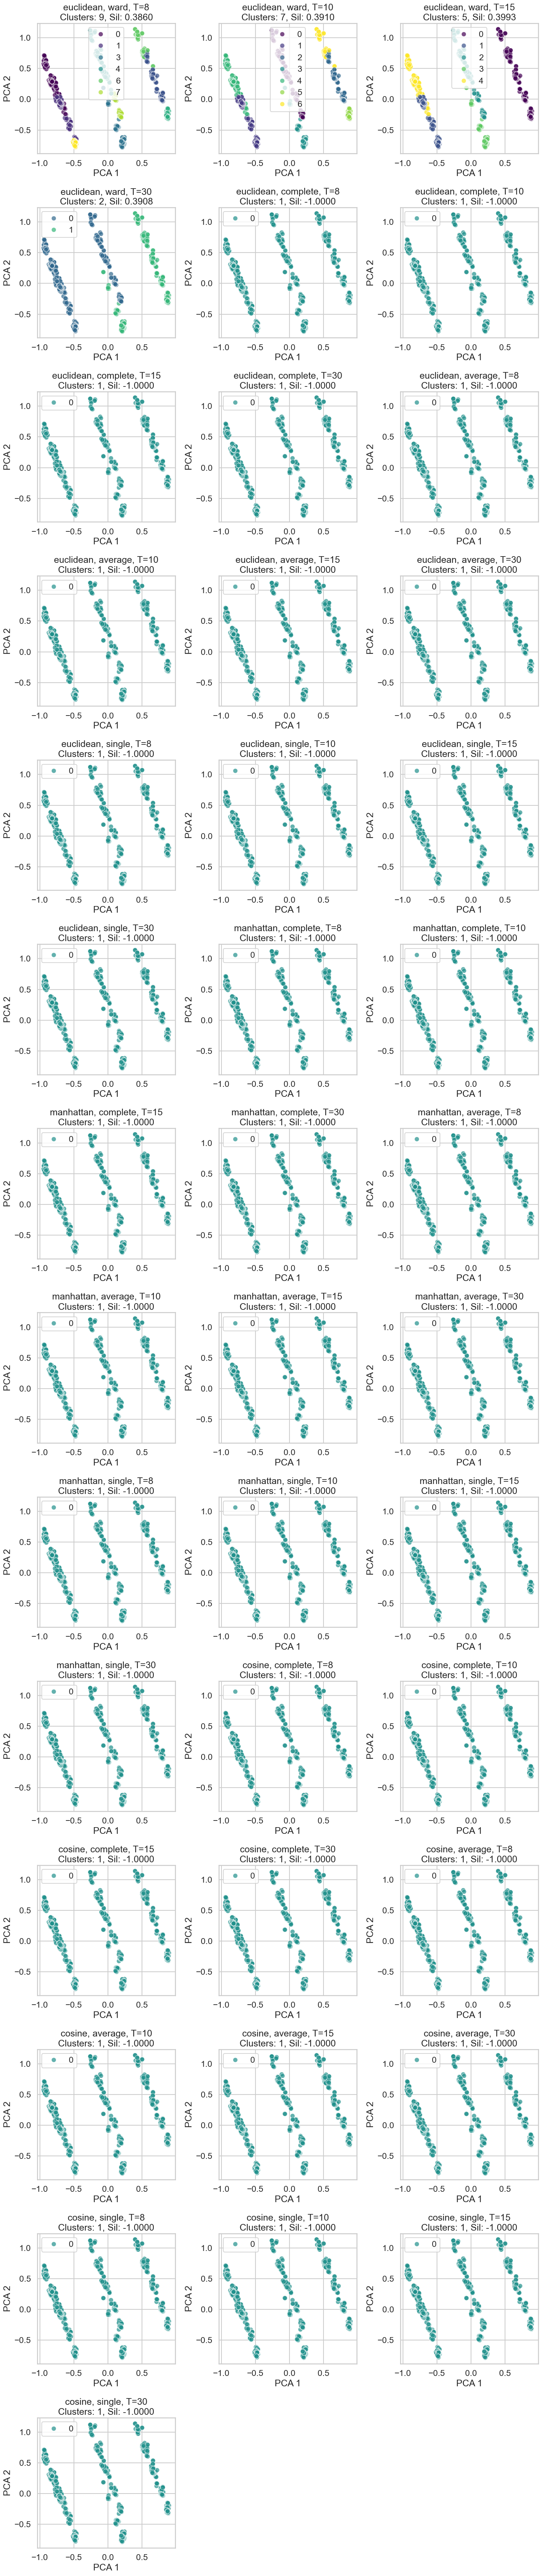

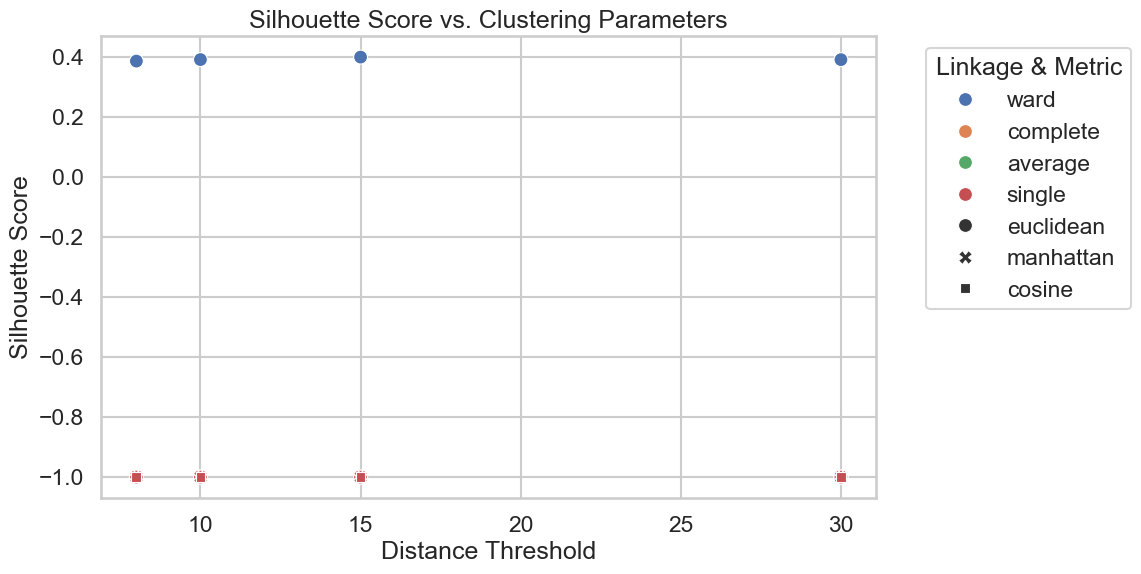

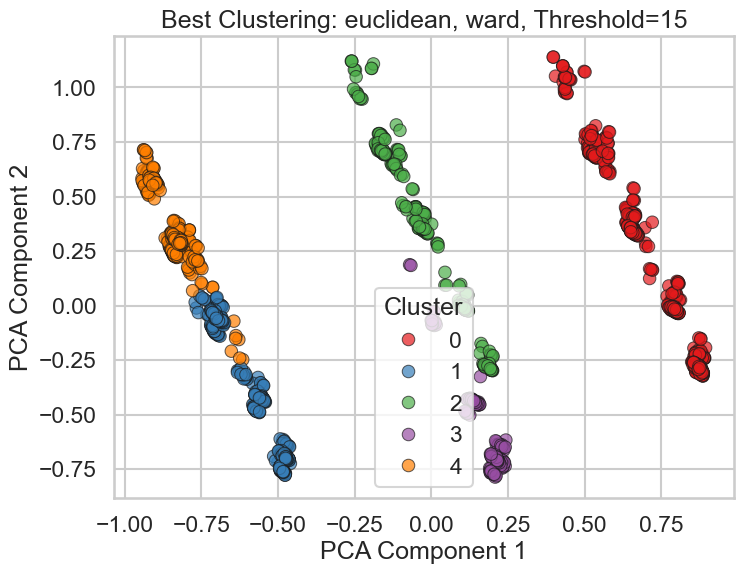

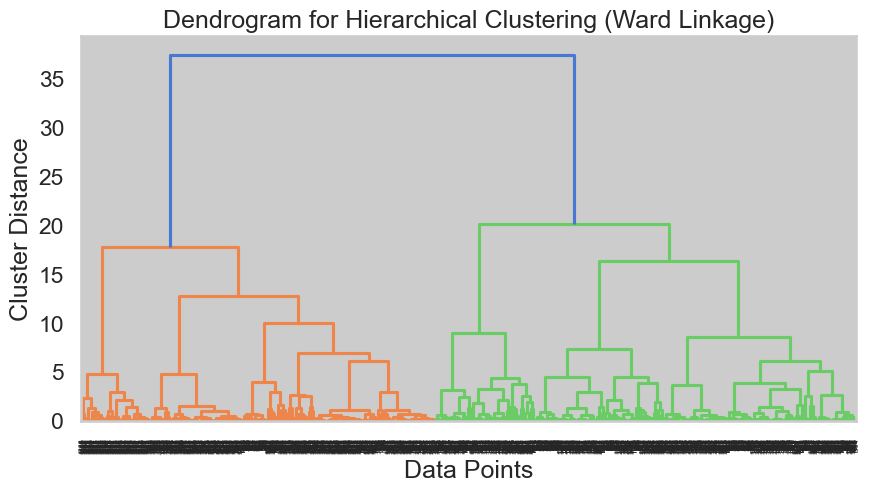


Best parameters: Metric=euclidean, Linkage=ward, Threshold=15
Best Silhouette Score: 0.3993


In [285]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

# Ensure we're using scaled_df without the ID column
scaled_df_no_id = scaled_df.drop(columns=['ID'], errors='ignore')

# Define parameters to test
metrics = ['euclidean', 'manhattan', 'cosine']
linkage_methods = ['ward', 'complete', 'average', 'single']
distance_thresholds = [8, 10, 15, 30]

best_score = -1
best_params = None
valid_plots = []  # Store valid clustering results
silhouette_data = []  # Store silhouette score data for visualization

# Loop through parameter combinations
for metric, linkage_method, threshold in itertools.product(metrics, linkage_methods, distance_thresholds):
    # Ward linkage requires Euclidean distance
    if linkage_method == 'ward' and metric != 'euclidean':
        continue

    try:
        # Perform Agglomerative Clustering
        clustering = AgglomerativeClustering(
            n_clusters=None, metric=metric, linkage=linkage_method, distance_threshold=threshold
        )
        labels = clustering.fit_predict(scaled_df_no_id)

        # Count the number of unique clusters
        num_clusters = len(set(labels))

        # Compute silhouette score if valid
        sil_score = silhouette_score(scaled_df_no_id, labels) if num_clusters > 1 else -1

        # Store results
        silhouette_data.append((metric, linkage_method, threshold, num_clusters, sil_score))

        if sil_score > best_score:
            best_score = sil_score
            best_params = (metric, linkage_method, threshold, labels)

        # Reduce dimensions for visualization
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(scaled_df_no_id)

        # Store valid clustering results for later plotting
        valid_plots.append((metric, linkage_method, threshold, num_clusters, sil_score, reduced_data, labels))

    except Exception as e:
        print(f"Skipping {metric}, {linkage_method}, Threshold={threshold} due to error: {e}")

# **1️⃣ Group All Generated Graphs into One Large Figure**
total_plots = len(valid_plots)
ncols = 3  # Set fixed number of columns
nrows = (total_plots + ncols - 1) // ncols  # Calculate rows dynamically

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))  # Adjust figure size dynamically
axs = axs.flatten()  # Flatten to easily access each subplot

for idx, (metric, linkage, threshold, num_clusters, sil_score, reduced_data, labels) in enumerate(valid_plots):
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='viridis', alpha=0.7, ax=axs[idx])
    axs[idx].set_title(f"{metric}, {linkage}, T={threshold}\nClusters: {num_clusters}, Sil: {sil_score:.4f}")
    axs[idx].set_xlabel("PCA 1")
    axs[idx].set_ylabel("PCA 2")

# Hide unused subplots
for idx in range(total_plots, len(axs)):
    axs[idx].axis("off")

plt.tight_layout()
plt.show()

# **2️⃣ Relationship Between Silhouette Score and Parameters**
silhouette_df = np.array(silhouette_data, dtype=object)  # Convert to NumPy array

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=silhouette_df[:, 2],  # Distance Threshold
    y=silhouette_df[:, 4],  # Silhouette Score
    hue=silhouette_df[:, 1],  # Linkage Method
    style=silhouette_df[:, 0],  # Metric Type
    palette="deep",
    s=100,
)
plt.xlabel("Distance Threshold")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Clustering Parameters")
plt.legend(title="Linkage & Metric", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# **3️⃣ Best Score Plot and Dendrogram**
if best_params:
    best_metric, best_linkage, best_threshold, best_labels = best_params
    best_pca = PCA(n_components=2).fit_transform(scaled_df_no_id)

    # Best Clustering Plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=best_pca[:, 0], y=best_pca[:, 1], hue=best_labels, palette='Set1', edgecolor='k', alpha=0.7)
    plt.title(f"Best Clustering: {best_metric}, {best_linkage}, Threshold={best_threshold}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title="Cluster")
    plt.show()

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering (Ward Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Cluster Distance")
plt.show()

# Print best parameters
print(f"\nBest parameters: Metric={best_params[0]}, Linkage={best_params[1]}, Threshold={best_params[2]}")
print(f"Best Silhouette Score: {best_score:.4f}")


**Optimal Clustering Parameters:**  
- **Distance Metric:** Euclidean  
- **Linkage Method:** Ward  
- **Distance Threshold:** 15  
- **Highest Silhouette Score:** 0.3993

### DBSCAN


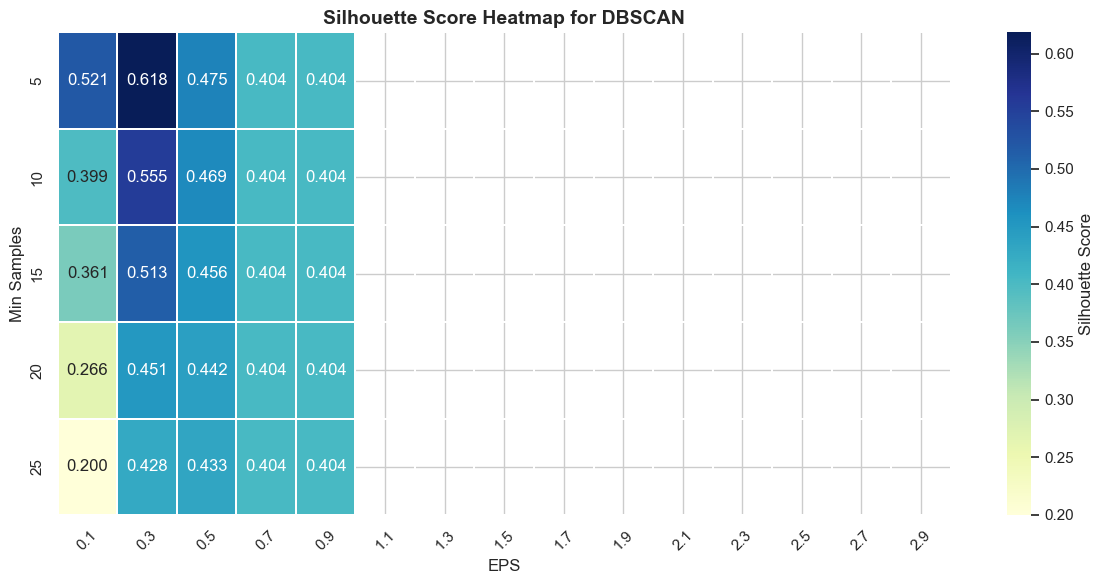

Best DBSCAN Parameters: EPS = 0.3, Min Samples = 5
Best Silhouette Score: 0.6184


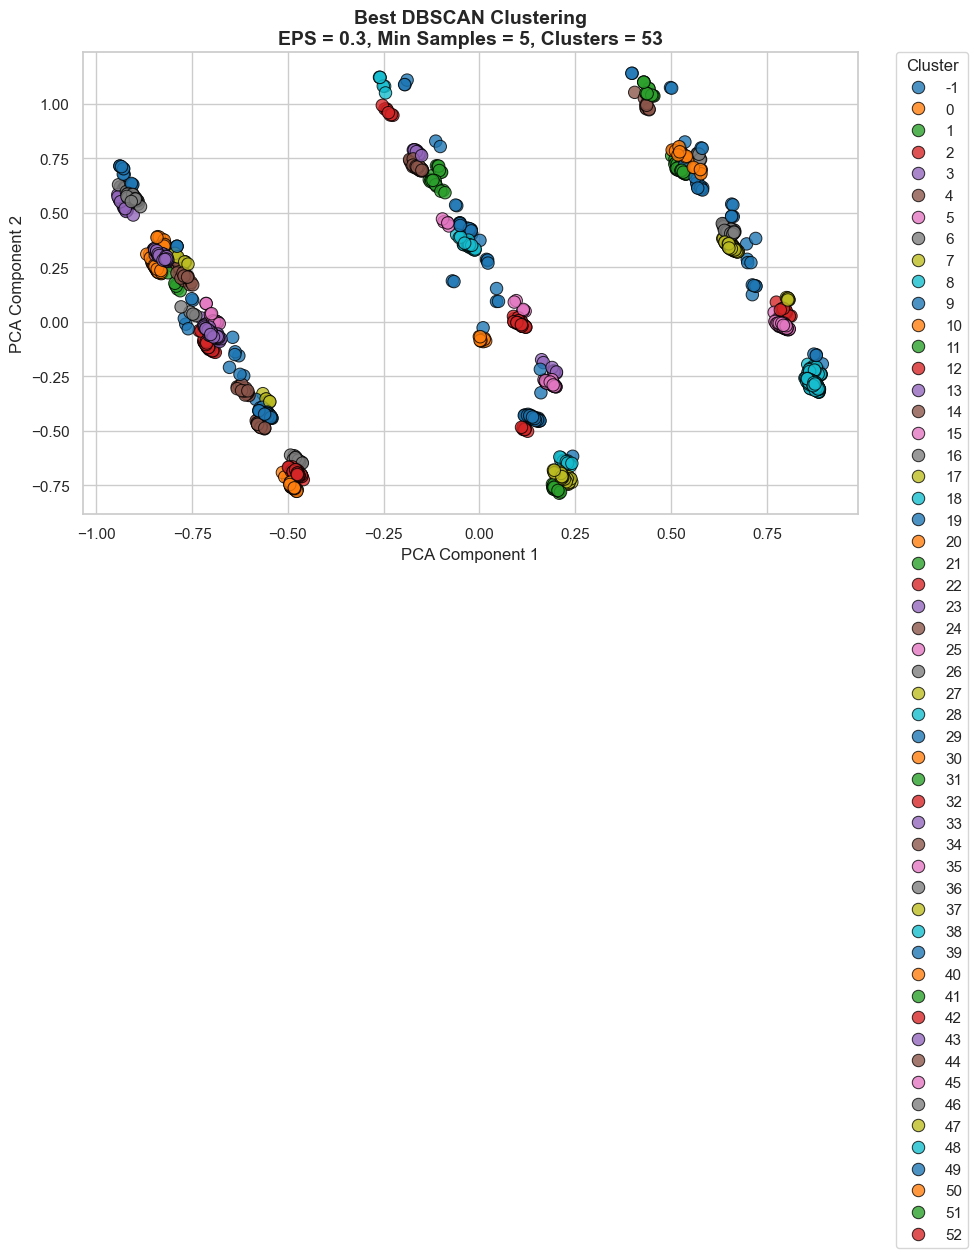

In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Set a clean and vibrant style
sns.set_theme(style="whitegrid", palette="deep")

# Define parameter ranges
eps_values = np.round(np.arange(0.1, 3.1, 0.2), 2)
min_samples_values = np.arange(5, 26, 5)

silhouette_scores = {}

# Loop through combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_df_no_id)

        # Valid clustering: more than one cluster and not all points isolated
        if 1 < len(set(labels)) < len(scaled_df_no_id):
            score = silhouette_score(scaled_df_no_id, labels)
            silhouette_scores[(eps, min_samples)] = score
        else:
            silhouette_scores[(eps, min_samples)] = np.nan

# Create DataFrame for heatmap
silhouette_df = pd.DataFrame(index=min_samples_values, columns=eps_values)

for (eps, min_samples), score in silhouette_scores.items():
    silhouette_df.at[min_samples, eps] = score

silhouette_df = silhouette_df.astype(float)

# Plot improved heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    silhouette_df,
    annot=True,
    cmap='YlGnBu',
    fmt=".3f",
    linewidths=0.3,
    cbar_kws={"label": "Silhouette Score"}
)
plt.title("Silhouette Score Heatmap for DBSCAN", fontsize=14, fontweight='bold')
plt.xlabel("EPS", fontsize=12)
plt.ylabel("Min Samples", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find best configuration
best_params = max(silhouette_scores, key=lambda k: silhouette_scores[k] if not np.isnan(silhouette_scores[k]) else -1)
best_sil_score = silhouette_scores[best_params]

print(f"Best DBSCAN Parameters: EPS = {best_params[0]}, Min Samples = {best_params[1]}")
print(f"Best Silhouette Score: {best_sil_score:.4f}")

# Apply DBSCAN using best parameters
best_dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
best_labels = best_dbscan.fit_predict(scaled_df_no_id)

# Number of clusters (excluding noise)
num_clusters = len(set(best_labels)) - (1 if -1 in best_labels else 0)

# PCA for 2D visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df_no_id)

# Create a DataFrame for easier plotting
plot_df = pd.DataFrame({
    'PCA1': pca_data[:, 0],
    'PCA2': pca_data[:, 1],
    'Cluster': best_labels
})

# Enhanced scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=plot_df,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='tab10',
    s=80,
    edgecolor='black',
    alpha=0.8
)
plt.title(f"Best DBSCAN Clustering\nEPS = {best_params[0]}, Min Samples = {best_params[1]}, Clusters = {num_clusters}",
          fontsize=14, fontweight='bold')
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


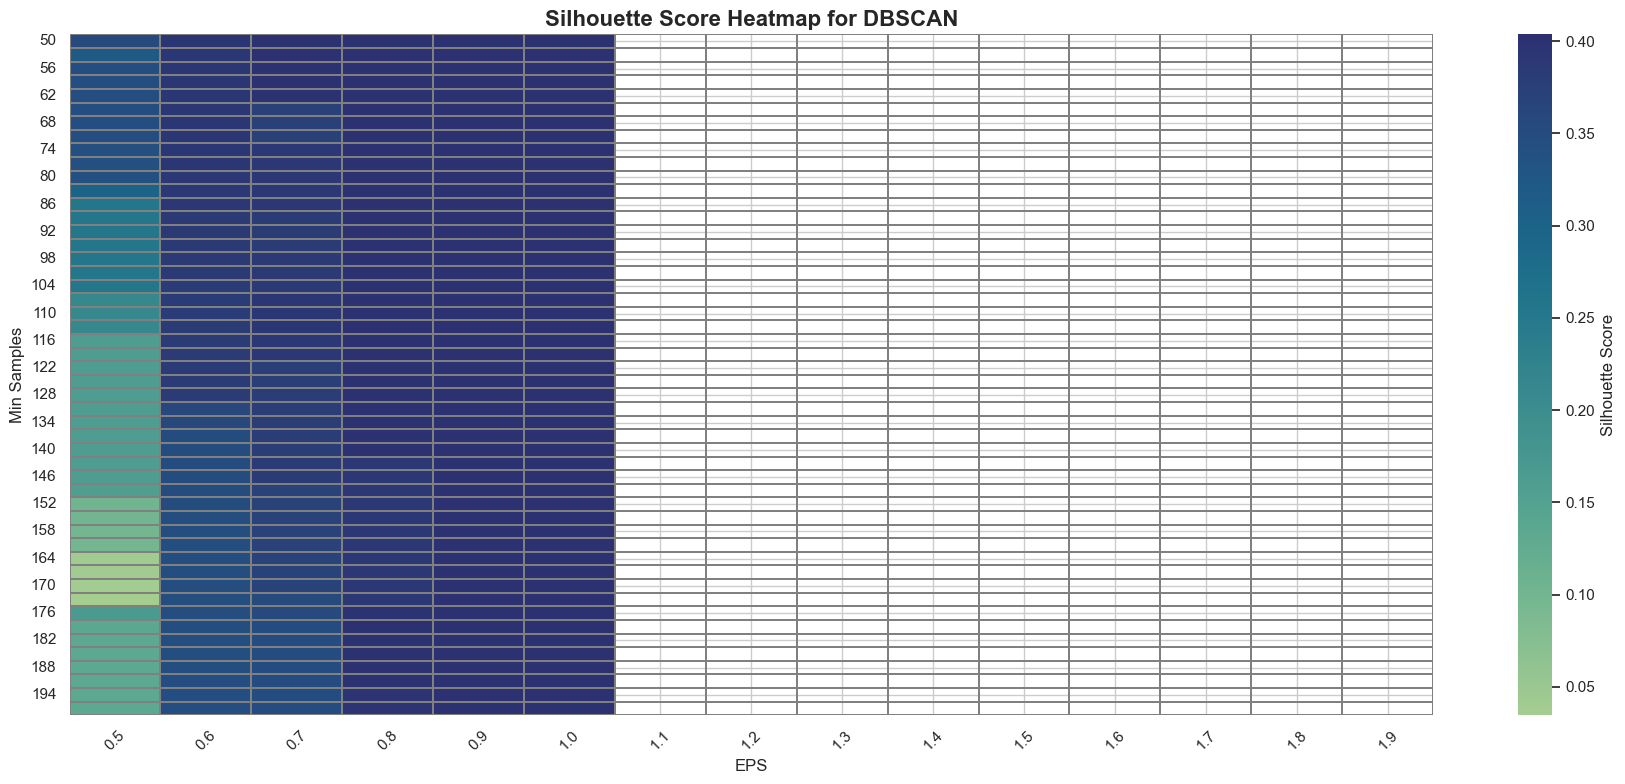

Best DBSCAN Parameters: EPS = 0.7, Min Samples = 50
Best Silhouette Score: 0.4036


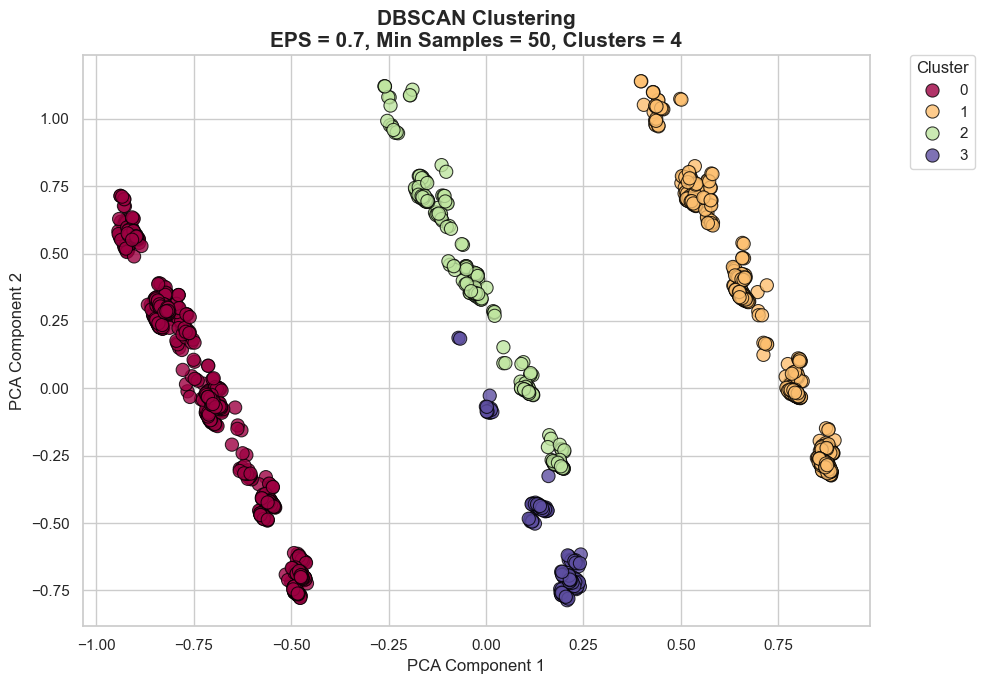

In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Set modern plot style
sns.set_theme(style="whitegrid", palette="colorblind")

# Adjusted parameter ranges
eps_values = np.round(np.arange(0.5, 2.0, 0.1), 2)
min_samples_values = np.arange(50, 200, 3)

silhouette_scores = {}

# Evaluate DBSCAN with each parameter combo
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_df_no_id)

        # Valid clustering only if more than 1 cluster and less than full spread
        if 1 < len(set(labels)) < len(scaled_df_no_id):
            sil_score = silhouette_score(scaled_df_no_id, labels)
            silhouette_scores[(eps, min_samples)] = sil_score
        else:
            silhouette_scores[(eps, min_samples)] = np.nan

# Create DataFrame to hold silhouette scores
silhouette_df = pd.DataFrame(index=min_samples_values, columns=eps_values)

for (eps, min_samples), score in silhouette_scores.items():
    silhouette_df.at[min_samples, eps] = score

silhouette_df = silhouette_df.astype(float)

# Enhanced heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(
    silhouette_df,
    cmap="crest",
    annot=False,  # You can turn this on if needed: annot=True, fmt=".3f"
    linewidths=0.3,
    linecolor='gray',
    cbar_kws={"label": "Silhouette Score"}
)
plt.title("Silhouette Score Heatmap for DBSCAN", fontsize=16, fontweight="bold")
plt.xlabel("EPS", fontsize=12)
plt.ylabel("Min Samples", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Determine best parameter set
best_params = max(
    silhouette_scores,
    key=lambda k: silhouette_scores[k] if not np.isnan(silhouette_scores[k]) else -1
)
best_sil_score = silhouette_scores[best_params]

print(f"Best DBSCAN Parameters: EPS = {best_params[0]}, Min Samples = {best_params[1]}")
print(f"Best Silhouette Score: {best_sil_score:.4f}")

# Apply DBSCAN with best parameters
best_dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
best_labels = best_dbscan.fit_predict(scaled_df_no_id)

# Number of clusters excluding noise
num_clusters = len(set(best_labels)) - (1 if -1 in best_labels else 0)

# PCA projection for 2D visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df_no_id)

plot_df = pd.DataFrame({
    'PCA1': pca_data[:, 0],
    'PCA2': pca_data[:, 1],
    'Cluster': best_labels
})

# Enhanced scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=plot_df,
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    palette="Spectral",
    s=90,
    edgecolor='black',
    alpha=0.8
)
plt.title(f"DBSCAN Clustering\nEPS = {best_params[0]}, Min Samples = {best_params[1]}, Clusters = {num_clusters}",
          fontsize=15, fontweight="bold")
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
plt.tight_layout()
plt.show()
